Luís Filipe M Loureiro

## Insper Jr- Solidariedade I

30/04

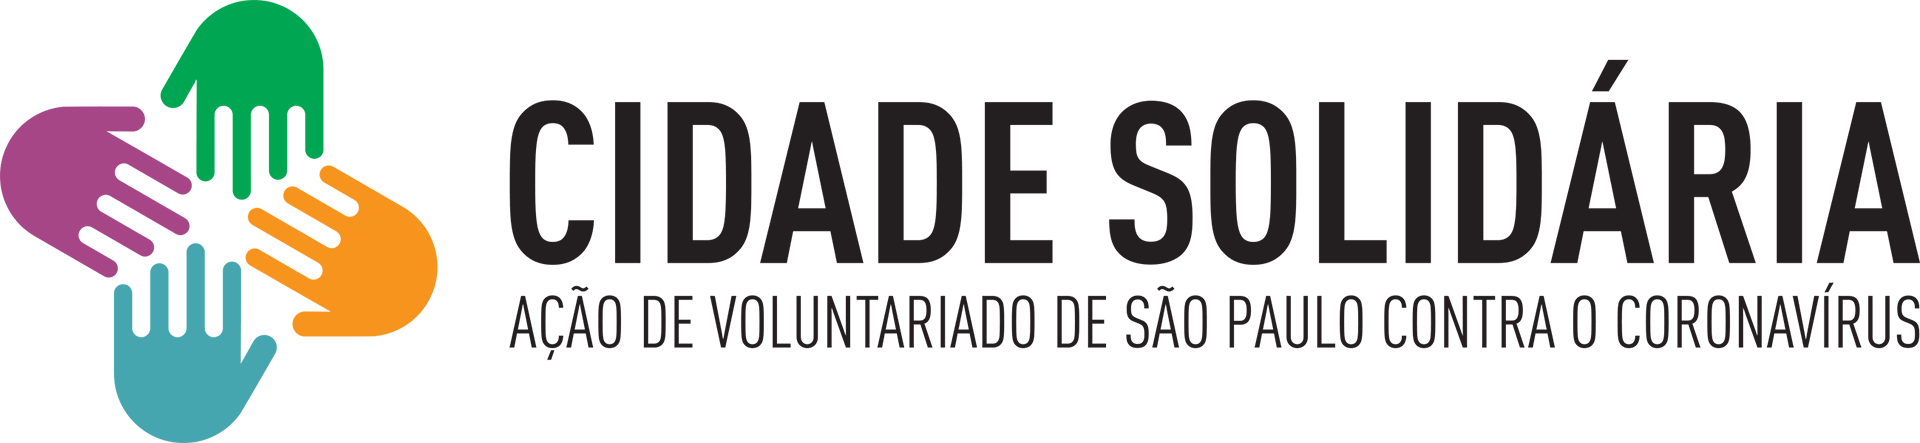

In [1]:
from IPython.display import Image
Image("logo.png")

Importando as Bibliotecas necessárias:

In [2]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import os
from numpy import arange, percentile
import numpy as np

In [3]:
dados = pd.read_excel('Levantamento de Dados de Arrecadação - Cidade Solidária (respostas) - RESUMO_SMC_29.04-converted.xlsx')
dados_idx = dados.set_index('Produto')
cestas_total= pd.read_excel('Dados_Totais.xlsx')

#### DataFrames que estamos trabalhando:

In [4]:
dados.head(5)

,Produto,Medida,Tipo,08/04,09/04,13/04,14/04,15/04,16/04,17/04,...,21/04,22/04,23/04,24/04,25/04,26/04,27/04,28/04,29/04,TOTAL
0,Absorvente,un,Higiene,8,65,285,35,96,127,165,...,27,0,214,27,0,0,40,6,24,1178
1,Achocolatado,400g,Alimentação,0,2,0,17,15,3,1,...,3,2,1,5,1,0,4,0,4,62
2,Açúcar,1kg,Alimentação,3,210,128,138,356,125,46,...,49,35,35,36,1,0,59,19,37,1366
3,Adoçante,100ml,Alimentação,0,0,3,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
4,Água,"1,5l",Alimentação,0,48,1,21,11,0,0,...,2,48,0,0,0,0,0,0,0,131


In [62]:
cestas=cestas_total.drop(['Unnamed: 1','Unnamed: 2'], axis=1)
kits = cestas.set_index('KITS TOTAL')
kits

,08/04,09/04,13/04,14/04,15/04,16/04,17/04,18/04,19/04,20/04,21/04,22/04,23/04,24/04,25/04,26/04,27/04,28/04,29/04,TOTAL
KITS TOTAL,,,,,,,,,,,,,,,,,,,,
Alimentação,54,38,23,29,28,23,17,34,6,40,12,41,82,18,1,1,128,14,13,602
Limpeza,0,34,0,8,0,1,8,0,0,0,0,0,0,0,0,0,105,0,0,156
Higiene,2,1,1,8,0,0,0,0,1,0,0,28,1,3,0,0,3,0,0,48


## Análise I

### Como o número de produtos recebidos variou ao longo do tempo?

In [7]:
dias=["08/04","09/04","13/04","14/04","15/04","16/04","17/04","18/04","19/04","20/04","21/04","22/04","23/04","24/04","25/04","26/04","27/04","28/04","29/04"]
valores=[]
for dia in dias:
    valores.append(dados[dia].sum())
    #print(dia)

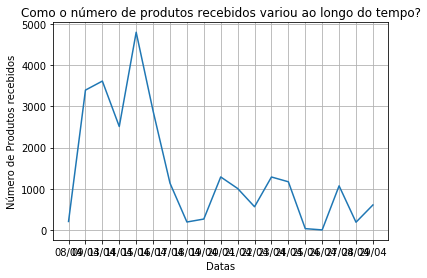

In [8]:
plt.plot(dias,valores)
plt.grid(True)
plt.xlabel("Datas")
plt.ylabel("Número de Produtos recebidos")
plt.title("Como o número de produtos recebidos variou ao longo do tempo?")
plt.show()

### Conclusão:

 - O número de doações nos últimos dias vem se mantendo em patamares bem baixos e apresenta alta variação

### Como o número de Kits recebidos variou ao longo do tempo?

In [9]:
alimentacao=[]
higiene=[]
limpeza=[]
for a in kits.loc["Alimentação"]:
    alimentacao.append(a)
for a in kits.loc["Higiene"]:
    higiene.append(a)
for a in kits.loc["Limpeza"]:
    limpeza.append(a)
       
alimentacao.pop(19)
higiene.pop(19)
limpeza.pop(19);

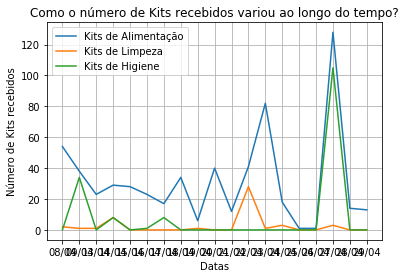

In [10]:
plt.plot(dias,alimentacao, label="Kits de Alimentação")
plt.plot(dias,higiene, label="Kits de Limpeza")
plt.plot(dias,limpeza,  label="Kits de Higiene")
plt.legend()
plt.grid(True)
plt.xlabel("Datas")
plt.ylabel("Número de Kits recebidos")
plt.title("Como o número de Kits recebidos variou ao longo do tempo?")
plt.show()

### Conclusão:

 - O número de kit de Alimentação não tem constância, apresenta picos esporádicos
 
 
 - O número de kits de limpeza e higiene são muito baixos

## Análise II

Os produtos e kits que os drive-thrus recebem correspondem a que porção do total das doações disponíveis?

Para responder essa pergunta precisamos somar os kits que já vem prontos com os kits que são montados a partir da doação dos produtos separados.

In [40]:
#Configuração dos kits de acordo com o site da Cidade Solidária
CESTAS=["Feijão","Leite em Pó","Açúcar", "Óleo", "Sal", "Farinha de Mandioca", "Arroz", "Macarrão", "Sardinha", "Molho de Tomate"]
Cmulti=["Leite em Pó", "Arroz", "Feijão",]
HIGIENE=["Sabonete", "Escova de Dente", "Pasta de Dentes", "Absorvente", "Papel Higiênico"]
LIMPEZA=["Água Sanitária", "Detergente", "Desinfetante", "Esponja"]
Lmulti=["Desinfetante"]


### Sobre as Cestas de Alimentação

In [67]:
Q={}
n=0
for elemento in CESTAS:
    if elemento in Cmulti:

        n+=dados_idx.loc[elemento]["TOTAL"][0]
        n+=dados_idx.loc[elemento]["TOTAL"][1]

        Q[elemento]= n
    else:  
        Q[elemento]= dados_idx.loc[elemento]["TOTAL"]
    n=0


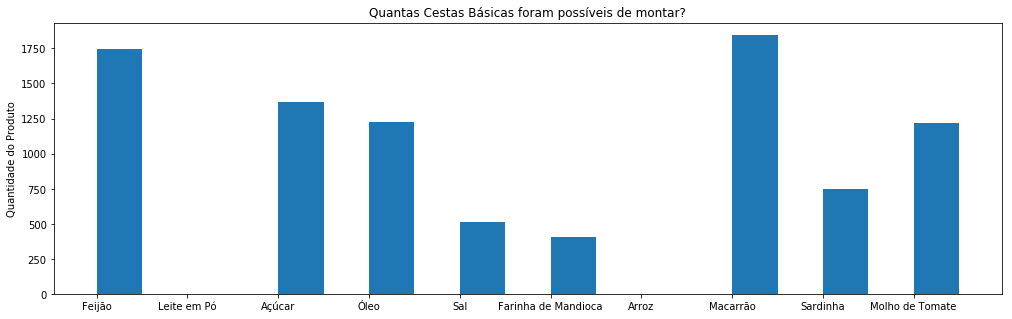

Seria possível montar, a partir dos produtos recebidos, 0 Cestas Básicas completas


In [77]:
names = list(Q.keys())
values = list(Q.values())

#tick_label does the some work as plt.xticks()
plt.figure(figsize=(17, 5))  # width:20, height:3
plt.bar(range(len(Q)), Q.values(), tick_label=names, align='edge', width=0.5)
plt.title("Quantas Cestas Básicas foram possíveis de montar?")
plt.ylabel("Quantidade do Produto")

plt.savefig('bar.png')
plt.show()

print("Seria possível montar, a partir dos produtos recebidos, {0} Cestas Básicas completas".format(Q["Arroz"]))


#### Total de Cestas Básicas (kits prontos + montadas):

In [45]:
print("Até o momento {0} Cestas Básicas vieram dos drive-thrus".format(kits.loc["Alimentação"]["TOTAL"]))

Até o momento 602 Cestas Básicas vieram dos drive-thrus


### Sobre os Kits de Higiene

In [73]:
Y={}

for elemento in HIGIENE:

    Y[elemento]= dados_idx.loc[elemento]["TOTAL"]

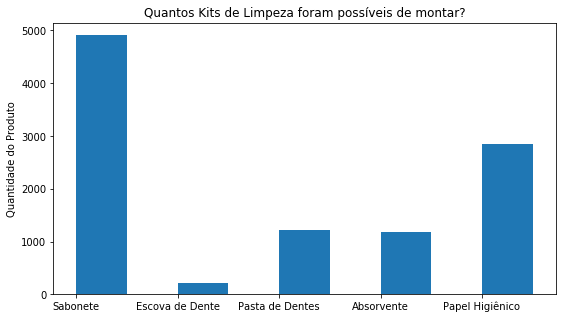

Seria possível montar, a partir dos produtos recebidos, 211 Kits de Higiene completos


In [76]:
names = list(Y.keys())
values = list(Y.values())

#tick_label does the some work as plt.xticks()
plt.figure(figsize=(9, 5))  # width:20, height:3
plt.bar(range(len(Y)), Y.values(), tick_label=names, align='edge', width=0.5)
plt.title("Quantos Kits de Limpeza foram possíveis de montar?")
plt.ylabel("Quantidade do Produto")

plt.savefig('bar.png')
plt.show()

print("Seria possível montar, a partir dos produtos recebidos, {0} Kits de Higiene completos".format(Y['Escova de Dente']))

#### Total de Kits de Higiene (kits prontos + montados):

In [55]:
print("Até o momento {0} Kits de Higiene vieram dos drive-thrus".format(kits.loc["Higiene"]["TOTAL"] + Y['Escova de Dente'] ))

Até o momento 259 Kits de Higiene vieram dos drive-thrus


### Sobre os Kits de Limpeza

In [56]:
D={}
n=0
for elemento in LIMPEZA:
    if elemento in Lmulti:
        n+=dados_idx.loc[elemento]["TOTAL"][0]
        n+=dados_idx.loc[elemento]["TOTAL"][1]
        D[elemento]= n
        n=0
        
    else:  
        D[elemento]= dados_idx.loc[elemento]["TOTAL"]
    


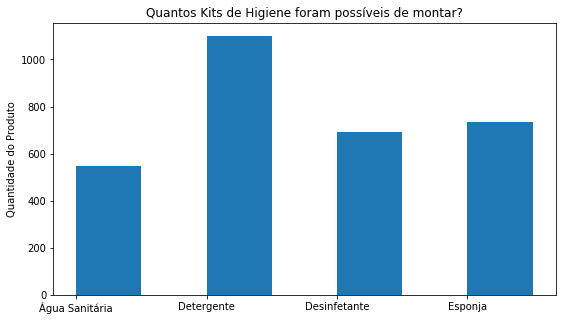

Seria possível montar, a partir dos produtos recebidos, 548 Kits de Limpeza completos


In [78]:
names = list(D.keys())
values = list(D.values())

#tick_label does the some work as plt.xticks()
plt.figure(figsize=(9, 5))  # width:20, height:3
plt.bar(range(len(D)), D.values(), tick_label=names, align='edge', width=0.5)
plt.title("Quantos Kits de Higiene foram possíveis de montar?")
plt.ylabel("Quantidade do Produto")

plt.savefig('bar.png')
plt.show()

print("Seria possível montar, a partir dos produtos recebidos, {0} Kits de Limpeza completos".format(D["Água Sanitária"]))

## Conclusões:


- Diante do tamanho da operação, poucos kits vem dos drive-thrus


- A frequência de recebimento dos produtos apresenta altíssima variação, evidenciando que a campanha de arrecadação não é consolidada
